# Laboratorio 1 : Monte Carlo y eficiencia de simulación

MA4402 - Simulación Estocástica: Teoría y Laboratorio

Profesor: Joaquín Fontobona T.

Auxiliares: Catalina Lizana, Álvaro Márquez, Matías Ortiz

30 de Agosto de 2023

**Integrantes:**

- Ramiro Hoffens
- Joaquín Márquez
- Miguel Escobar
-

## Problema 1

En _python_ existen distintas librerías que permiten simular variables aleatorias. Entre ellas se destacan las siguientes:

- [_Numpy_](https://numpy.org/doc/)

- [_Scipy_](https://docs.scipy.org/doc/scipy/)

- [_Random_](https://docs.python.org/3/library/random.html)

> 1 - Programe la función ``uniforme``, que reciba un valor entero n y un método (_Numpy_, _Scipy_ o _Random_), y retorne $n$ simulaciones de una variable aleatoria uniforme en $[0, 1]$.

In [40]:
import numpy as np
from numpy.random import uniform as numpy_uniform
from random import random
from scipy.stats import uniform as scipy_uniform

def uniforme(n, method):
    if method == 'numpy':
        return numpy_uniform(0, 1, n)
    elif method == 'random':
        return np.array([random() for _ in range(n)])
    elif method == 'scipy':
        return scipy_uniform.rvs(size=n)


# # Test:
 
# print(uniforme(10, 'numpy'))
# print(uniforme(10, 'random'))
# print(uniforme(10, 'scipy'))
    

> 2 - Genere $10^6$ uniformes para cada librería y grafique en un histograma cada muestra generada, utilizando la librería seaborn.

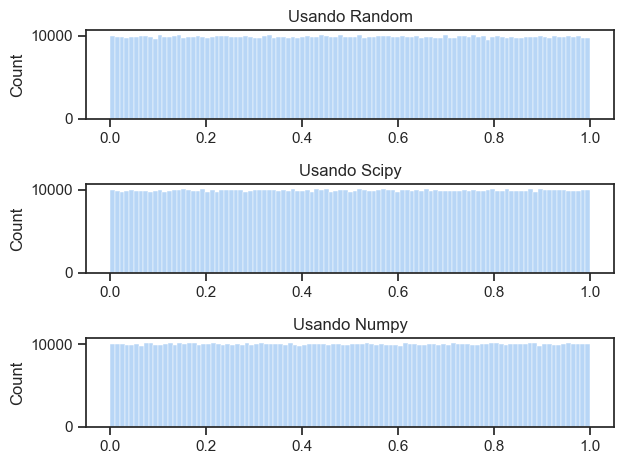

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

random_uniform_sample = uniforme(1_000_000, 'random')
scipy_uniform_sample = uniforme(1_000_000, 'scipy')
numpy_uniform_sample = uniforme(1_000_000, 'numpy')

fig = plt.figure()

randomax = fig.add_subplot(311)
scipyax = fig.add_subplot(312)
numpyax = fig.add_subplot(313)

randomax.set_title('Usando Random')
numpyax.set_title('Usando Numpy')
scipyax.set_title('Usando Scipy')

custom_params = {"axes.spines.right": False, "axes.spines.top": False}

sns.set_theme(style='ticks', palette='pastel')
sns.histplot(random_uniform_sample, ax=randomax, )
sns.histplot(numpy_uniform_sample, ax=numpyax)
sns.histplot(scipy_uniform_sample, ax=scipyax)

fig.tight_layout()
plt.show()


> 3 - Genere $100$ muestras de $1000$ uniformes en $[0,1]$ y utilizando la librería time calcule los tiempos de ejecución que toman generar cada muestra para cada librería. Grafique los tiempos encontrados para cada método y calcule la media y varianza del tiempo de ejecución por muestra de cada método.

In [42]:
from time import perf_counter

def time_method(method, sample_size=1000):
    t1 = perf_counter()
    uniforme(sample_size, method)
    t2 = perf_counter()
    return t2 - t1

numpy_times = np.array([time_method('numpy') for _ in range(100)])
scipy_times = np.array([time_method('scipy') for _ in range(100)])
random_times = np.array([time_method('random') for _ in range(100)])

print(f'Numpy.random tomó en promedio {numpy_times.mean()} [s], con una varianza de {numpy_times.var()} [s^2]')
print(f'La librería random tomó en promedio {random_times.mean()} [s], con una varianza de {random_times.var()} [s^2]')
print(f'Scipy.stats.uniform.rvs tomó en promedio {scipy_times.mean()} [s], con una varianza de {scipy_times.var()} [s^2]')




Numpy.random tomó en promedio 1.0184950660914182e-05 [s], con una varianza de 5.484267194027473e-10 [s^2]
La librería random tomó en promedio 5.292962130624801e-05 [s], con una varianza de 1.0292482116256643e-11 [s^2]
Scipy.stats.uniform.rvs tomó en promedio 2.035915676970035e-05 [s], con una varianza de 4.954172262534628e-11 [s^2]


> 4 - En base a los resultados anteriores. ¿Cual es el mejor método a utilizar? Argumente.

La implementación de Numpy es la más eficiente, tomando 2/3 del tiempo de scipy approx, y más de 3 veces menos que la de la librería random. La varianza en los 3 métodos es suficientemente chica como para que la diferencia de rendimiento no sea debido a errores aleatorios en la medición. Además que es mucho más simple de usar en mi opinion.

Distinto sería si se busca trabajar con una variable aleatoria en una forma más abstracta. Para esto, la implementación de scipy es mejor, utilizando el objeto scipy.stats.uniform.

> 5 - Genere funciones que permitan obtener una muestra para las siguientes variables a partir de uniformes:

- $Bernoulli(p)$

- $Binomial(p,N)$

- $Geometrica(p)$

> Utilice estas funciones y la librería _random_ para generar muestras de estas variables. Compare los tiempos de ejecución con los métodos para simular directamente estas variables disponibles en las librerías _numpy_ y _scipy_ (note que $Bernoulli(p)=Binomial(p,1)$).

In [71]:
from numpy.random import binomial as numpy_binomial
from scipy.stats import binom as scipy_binomial
from numpy.random import geometric as numpy_geometrica
from scipy.stats import geom as scipy_geometrica

def sampling_preformance(nrepeats, samplingfunc):
    t = 0
    for _ in range(nrepeats):
        t1 = perf_counter()
        samplingfunc()
        t2 = perf_counter()
        t += t2 - t1
    return t/nrepeats

def bernoulli(p):
    return 1 if random() < p else 0

def binomial(n, p):
    return np.sum([bernoulli(p) for _ in range(n)])

def geometrica(p):
    n = 1
    while bernoulli(p) == 0:
        n += 1
    return n


N = 10
p = 0.3


bernoullitime = sampling_preformance(1_000, lambda: bernoulli(p))
binomtime = sampling_preformance(1_000, lambda: binomial(N, p))
geomtime = sampling_preformance(1_000, lambda: geometrica(p))

npbernoullitime = sampling_preformance(1_000, lambda: numpy_binomial(1, p))
npbinomtime = sampling_preformance(1_000, lambda: numpy_binomial(N, p))
npgeomtime = sampling_preformance(1_000, lambda: numpy_geometrica(p))

scipybernoullitime = sampling_preformance(1_000, lambda: scipy_binomial.rvs(1, p))
scipybinomtime = sampling_preformance(1_000, lambda: scipy_binomial.rvs(N, p))
scipygeomtime = sampling_preformance(1_000, lambda: scipy_geometrica.rvs(p))

print(f'La implementación usando random() tomó {bernoullitime:.3e} [s] para una bernoulli, {binomtime:.3e} [s] para una binomial y {geomtime:.3e} [s] para una geométrica')
print(f'La implementación usando Numpy tomó {npbernoullitime:.3e} [s] para una bernoulli, {npbinomtime:.3e} [s] para una binomial y {npgeomtime:.3e} [s] para una geométrica')
print(f'La implementación usando Scipy tomó {scipybernoullitime:.3e} [s] para una bernoulli, {scipybinomtime:.3e} [s] para una binomial y {scipygeomtime:.3e} [s] para una geométrica')





La implementación usando random() tomó 1.480e-07 [s] para una bernoulli, 5.841e-06 [s] para una binomial y 3.378e-07 [s] para una geométrica
La implementación usando Numpy tomó 5.258e-07 [s] para una bernoulli, 5.125e-07 [s] para una binomial y 6.268e-07 [s] para una geométrica
La implementación usando Scipy tomó 2.127e-05 [s] para una bernoulli, 1.763e-05 [s] para una binomial y 1.562e-05 [s] para una geométrica


Notamos que la implementación propia es competitiva, siendo la mejor para obtener una realización de variable aleatoria bernoulli y geométrica. Sin embargo, las ventajas de las librerías empiezan a verse en el momento de simular varias realizaciones de una variable aleatoria:

In [75]:
Nsample = 10_000

bernoullitime = sampling_preformance(100, lambda: [bernoulli(p) for _ in range(Nsample)])
binomtime = sampling_preformance(100, lambda: [binomial(N, p) for _ in range(Nsample)])
geomtime = sampling_preformance(100, lambda: [geometrica(p) for _ in range(Nsample)])

npbernoullitime = sampling_preformance(100, lambda: numpy_binomial(1, p, size=Nsample))
npbinomtime = sampling_preformance(100, lambda: numpy_binomial(N, p, size=Nsample))
npgeomtime = sampling_preformance(100, lambda: numpy_geometrica(p, size=Nsample))

scipybernoullitime = sampling_preformance(100, lambda: scipy_binomial.rvs(1, p, size=Nsample))
scipybinomtime = sampling_preformance(100, lambda: scipy_binomial.rvs(N, p, size=Nsample))
scipygeomtime = sampling_preformance(100, lambda: scipy_geometrica.rvs(p, size=Nsample))

print(f'La implementación usando random() tomó {bernoullitime:.3e} [s] para {Nsample} bernoullis, {binomtime:.3e} [s] para {Nsample} binomiales y {geomtime:.3e} [s] para {Nsample} geométricas')
print(f'La implementación usando Numpy tomó {npbernoullitime:.3e} [s] para {Nsample} bernoullis, {npbinomtime:.3e} [s] para {Nsample} binomiales y {npgeomtime:.3e} [s] para {Nsample} geométricas')
print(f'La implementación usando Scipy tomó {scipybernoullitime:.3e} [s] para {Nsample} bernoullis, {scipybinomtime:.3e} [s] para {Nsample} binomiales y {scipygeomtime:.3e} [s] para {Nsample} geométricas')



La implementación usando random() tomó 6.115e-04 [s] para 10000 bernoullis, 3.540e-02 [s] para 10000 binomiales y 2.175e-03 [s] para 10000 geométricas
La implementación usando Numpy tomó 1.216e-04 [s] para 10000 bernoullis, 2.900e-04 [s] para 10000 binomiales y 1.566e-04 [s] para 10000 geométricas
La implementación usando Scipy tomó 1.428e-04 [s] para 10000 bernoullis, 3.164e-04 [s] para 10000 binomiales y 1.795e-04 [s] para 10000 geométricas


Aquí podemos ver cómo las librerías superan a la implementación propia al momento de generar 10000 realizaciones de la variable aleatoria. Considerando que numpy y scipy tienen que construir un objeto tipo np.array usualmente, esto podría explicar por qué no son tan eficientes para generar una sola realización de una variable aleatoria como la implementación directa propia.

Las librerías anteriores generan números **pseudoaleatorios** que se asemeja bastante a lo que se necesita.

> 6 - Averigüe y explique en qué consisten los métodos para generar números pseudoaleatorios uniformes en $[0,1]$ disponibles en la versión que se usará de Python. Especifique: número de bits, período (de congruencias lineal utilizada o medida equivalente para el método que corresponda), posibilidad y manera de cambiar semilla. Utilizar aproximadamente media plana de desarrollo incluyendo tablas y/o figuras.

Respuesta:



## Pregunta 2

Tomando en cuenta que

$$ I = \frac{\pi}{4} = \int^1_0\sqrt{1-x^2}dx=\int^1_0\int^1_0\mathbf{1}_{\{x^2+y^2\leq 1\}}dxdy \, ,$$

se considerarán dos métodos de Monte Carlo para calcular numéricamente $I$:

- Utilizando la variable aleatoria $X=\sqrt{1-U^2}$, con $U$ v.a. uniforme en $[0,1]$.

- Utilizando la variable aleatoria $Z={1}_{\{x^2+y^2\leq 1\}}$, con $U_i$ v.a. uniforme en $[0,1]$ e independientes.

> 1 - Calcule las varianzas $Var(X)$ y $Var(Z)$ de forma teórica y de forma simulada con diferentes cantidades de réplicas $n$. Grafique. Estime una cantidad de réplicas necesarias para $X$ y $Z$ con tal de obtener una aproximación de la varianza con un error del orden del $1\%$.

#### Respuesta teórica

Las varianzas respectivas las calcularemos de forma clásica, es decir:
$$\mathbb{E}\left[(X-\overline{X})^2\right] = \mathbb{E}\left[X^2\right]-\mathbb{E}\left[X\right]^2$$
Así, para $X$ obtenemos que esto corresponde a:
$$\mathbb{E}\left[X^2\right] = \int_0^1(1-x^2)dx = 1 - \left.\frac{x^3}{3}\right|_0^1 = 1 - \frac{1}{3} = \frac{2}{3}$$
Luego, sabemos que la esperanza es el valor de la integral que deseamos aproximar, esto es $\frac{\pi}{4}$. Entonces nos queda que la varianza es:
$$\text{Var}(X) = \frac{2}{3} - \frac{\pi^2}{16}$$
Por su parte con $Z$ haremos el desarrollo con la definición, esta es:
$$\text{Var}(Z) = \mathbb{E}\left[(Z-\overline{Z})^2\right]$$
Entonces si hacemos este cálculo se obtiene
$$\int_0^1\int_0^1 \left(\mathbf{1}_{x^2+y^2\leq 1}-\frac{\pi}{4}\right)^2 dxdy = \int_0^1\int_0^1 \mathbf{1}_{x^2+y^2\leq 1} - \frac{\pi}{2}\mathbf{1}_{x^2+y^2\leq 1} + \frac{\pi^2}{4^2} = \frac{\pi}{4}-\frac{\pi^2}{16}$$

In [44]:
# Respuesta programada
def X(n):
    """
    Toma un n entero positivo y realiza n simulaciones iid de X\n
    #################################\n
    Input:\n
    n = Int
    """
    U = np.random.uniform(0,1,n)
    X = np.sqrt(1 - U ** 2)
    return X

def varianzaX(n):
    """
    Calcula la varianza de X a mano con n simulaciones iid de tamaño n\n
    #################################\n
    Input:\n
    n = Int
    """
    valores = X(n)
    return np.var(valores)


def simularX(n):
    """
    Esta función realiza la esperanza como la suma para\n
    montecarlo usando las variables aleatorias X, n veces iid\n
    #################################\n
    Input\n
    n = Int
    """
    simulaciones = X(n)
    return np.sum(simulaciones) / n

print(np.pi/4)
print(simularX(1_000_000))

def Z(n):
    """
    Toma un n y realiza n simulaciones iid de Z\n
    La idea es modelar un cuadrado de lado n
    #################################\n
    Input\n
    n = Int
    """
    protoUx = np.random.uniform(0,1,n)
    protoUy = np.random.uniform(0,1,n)
    Z = (protoUx ** 2 + protoUy ** 2 <= 1)
    return Z*1

def varianzaZ(n):
    """
    Calcula la varianza de Z a mano con n simulaciones iid de tamaño n\n
    #################################\n
    Input:\n
    n = Int
    """
    valores = Z(n)
    return np.var(valores)

def simularZ(n):
    """
    Esta función realiza la esperanza como la suma para\n
    montecarlo usando las variables aleatorias Z, n veces iid\n
    #################################\n
    Input\n
    n = Int
    """
    simulaciones = Z(n)
    return np.sum(simulaciones) / n

print(np.pi/4)
print(simularZ(1_000_000))

0.7853981633974483
0.7852931645671889
0.7853981633974483
0.785186


/Users/miguel/.pyenv/versions/3.11.0/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3747: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/miguel/.pyenv/versions/3.11.0/lib/python3.11/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/miguel/.pyenv/versions/3.11.0/lib/python3.11/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


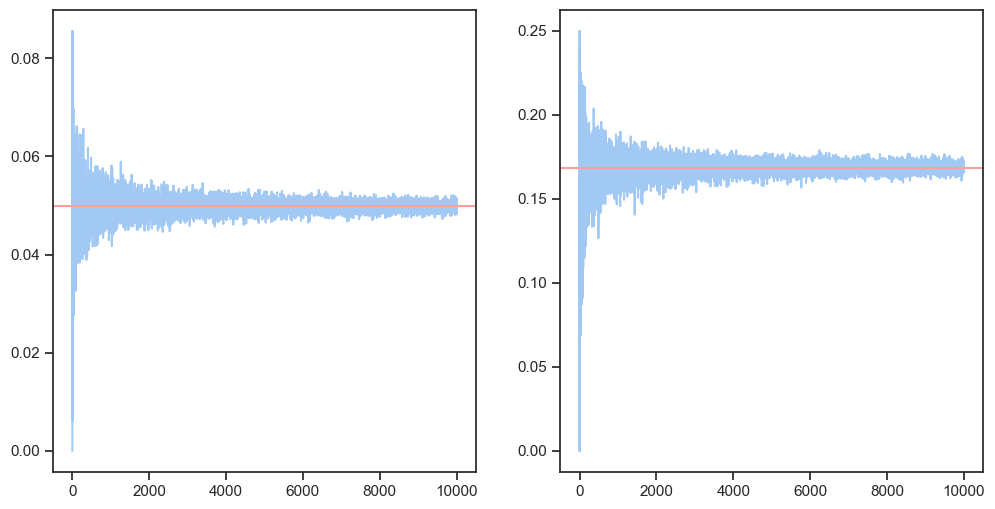

In [45]:
N = 10_000
varsX = np.zeros(N)
varsZ = np.zeros(N)
for k in range(N):
    varX = varianzaX(k)
    varZ = varianzaZ(k)
    varsX[k] = varX
    varsZ[k] = varZ

fig, ax = plt.subplots(1,2,figsize=(12,6))

sns.lineplot(data=varsX, ax=ax[0])
sns.lineplot(data=varsZ, ax=ax[1])
ax[0].axhline(2/3 - (np.pi/4)**2,color="r")
ax[1].axhline(np.pi/4 - (np.pi/4) ** 2,color="r")

plt.show()

In [46]:
def indicatrix(x, a, b):
    return (x <= b)*(x >= a)

replicas = [10, 100, 1_000, 1_000_000, 10_000_000]

xvars = []
zvars = []
for n in replicas:

    ux = uniforme(n, 'numpy')
    uy = uniforme(n, 'numpy')

    x_samples = np.sqrt(1 - ux**2)
    z_samples = indicatrix(ux**2 + uy**2, 0, 1)
    xvars.append(x_samples.var())
    zvars.append(z_samples.var())

xvars = np.array(xvars)
zvars = np.array(zvars)


print(xvars)
print(zvars)


[0.008801   0.04827342 0.05344543 0.04989076 0.04980243]
[0.09       0.1824     0.176016   0.16862274 0.16848141]


> 2 - Calcule la cantidad de réplicas necesarias para $X$ y $Z$ con tal de aproximar $I$ con un error máximo de $Err_1 = 0,1$ y probabilidad $Pr_1 = 90 \%$. Haga el mismo ejercicio con $Err_2 = 0,01$ y $Pr_2 = 95 \%$, $Err_3 = 0,001$ y $Pr_3 = 99 \%$.

Ya sabemos las varianzas en cada caso de X y Z respectivamente. El error que queremos se puede calcular mediante ley de los grandes números, que nos da la siguiente fórmula:
$$n\geq \frac{\text{Var}(A)M^2_{\frac{\alpha}{2}}}{\varepsilon}$$
Donde $A$ es $X$ o $Z$ según el caso que queramos, $\varepsilon$ es el valor que queremos de error con $1-\alpha$ probabilidad de certeza. $M_a$ representa la inversa de la función acumulada evaluada en $a$, es decir
$$\mathbb{P}(\mathcal{N}(0,1)>M_a) = a$$
En otras palabras, corresponde a la función cuantil. Entonces se obtiene la fórmula antes mencionada.

In [47]:
errs = np.array([0.1, 0.01, 0.001])
probs = np.array([0.9, 0.95, 0.99])
Nxs = np.zeros(3)
Nzs = np.zeros(3)

var_x = 2/3 - (np.pi/4) ** 2
var_z = np.pi/4 - (np.pi/4) ** 2

for k in range(3):
    err = errs[k]
    prob = probs[k]
    Z_quantil = norm.ppf((1-prob)/2)
    n_x = int(np.ceil(var_x**2 * Z_quantil ** 2 / err ** 2))
    n_z = int(np.ceil(var_z**2 * Z_quantil ** 2 / err ** 2))
    Nxs = np.append(Nxs, n_x)
    Nzs = np.append(Nzs, n_z)
    print("El n mínimo para x con error ", err ," y probabilidad ",prob," es ",n_x)
    print("El n mínimo para z con error ", err ," y probabilidad ",prob," es ",n_z)

El n mínimo para x con error  0.1  y probabilidad  0.9  es  1
El n mínimo para z con error  0.1  y probabilidad  0.9  es  8
El n mínimo para x con error  0.01  y probabilidad  0.95  es  96
El n mínimo para z con error  0.01  y probabilidad  0.95  es  1092
El n mínimo para x con error  0.001  y probabilidad  0.99  es  16466
El n mínimo para z con error  0.001  y probabilidad  0.99  es  188487


In [48]:
from scipy.stats import norm

def n_simulations(error, probability, std):
    n = (std**2 * norm.ppf(probability/2)**2)/error**2
    return np.floor(n)+1

theoretical_variance_X = 2/3 - np.pi**2/16
theoretical_variance_Z = np.pi/4 - np.pi**2/16

stdx = np.sqrt(theoretical_variance_X)
stdz = np.sqrt(theoretical_variance_Z)

# Caso 1:
prob = 0.9
epsilon = 0.1
nx = n_simulations(epsilon, prob, stdx)
nx

1.0

> 3 - Aproxime las esperanzas $\mathbb{E}(X)$ y $\mathbb{E}(Z)$ de forma simulada con diferentes cantidades de réplicas $n$ hasta
llegar al $n^*$ tal que se cumple $Err3$ y $Pr3$.

- Grafique las aproximaciones en función de la cantidad de réplicas.

- Grafique el tiempo utilizado en aproximar las esperanzas en función de la cantidad de réplicas. 

- Estime los costos de simular una réplica de $X$ y una réplica de $Z$.

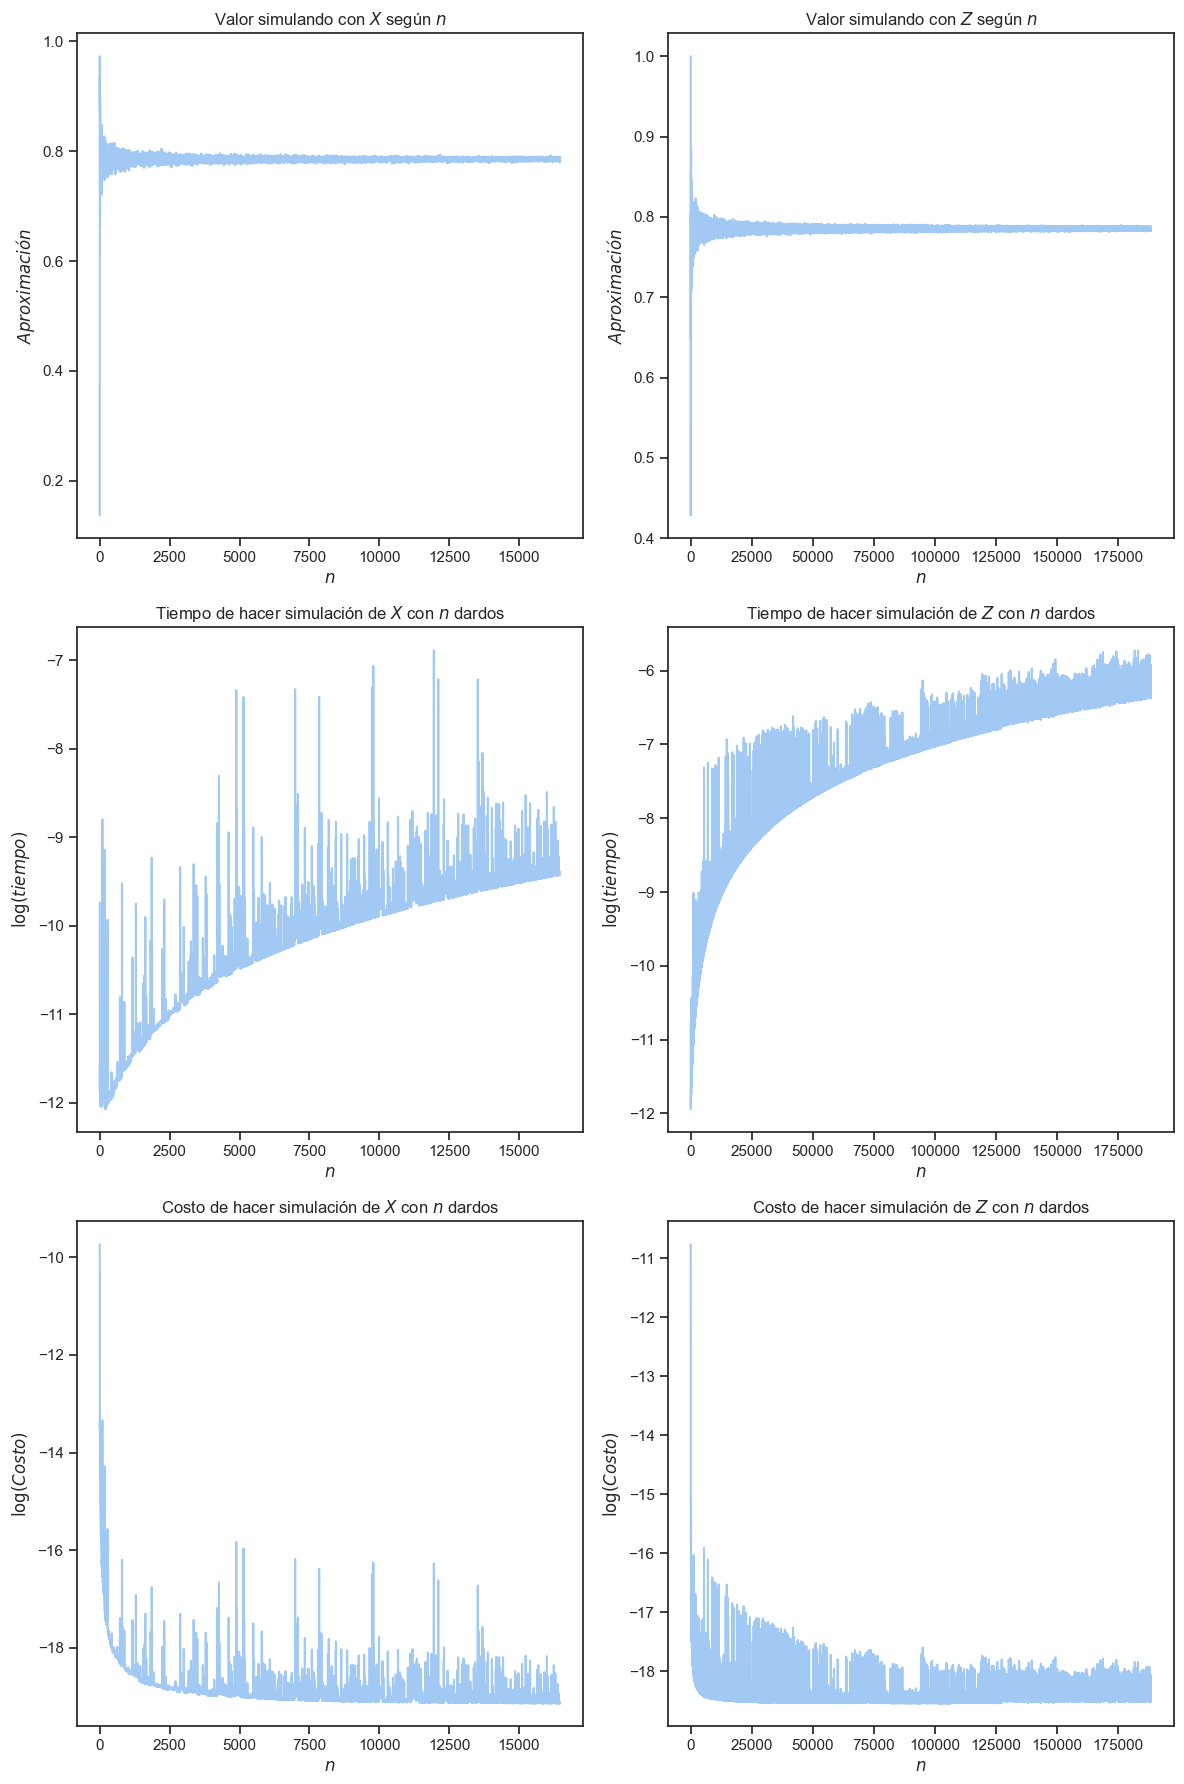

In [49]:
# Ahora vamos a hacer ciclos while para obtener el n* y corroborar lo que nos preguntan

err = 0.001
prob = 0.99
Nx = int(Nxs[-1])
Nz = int(Nzs[-1])
intentosX = np.zeros(Nx)
intentosZ = np.zeros(Nz)
tiemposX = np.zeros(Nx)
tiemposZ = np.zeros(Nz)
costosX = np.zeros(Nx)
costosZ = np.zeros(Nz)

for k in range(Nx):
    ti = perf_counter()
    Valor = simularX(k+1)
    tf = perf_counter()
    intentosX[k] = Valor
    dt = tf - ti
    tiemposX[k] = dt
    costo = dt/(k+1)
    costosX[k] = costo
for k in range(Nz):
    ti = perf_counter()
    Valor = simularZ(k+1)
    tf = perf_counter()
    intentosZ[k] = Valor
    dt = tf - ti
    tiemposZ[k] = dt
    costo = dt/(k+1)
    costosZ[k] = costo

fig, ax = plt.subplots(3,2,figsize=(12,18))

ax[0,0].plot(intentosX)
ax[0,0].set_title(r"Valor simulando con $X$ según $n$")
ax[0,0].set_xlabel(r"$n$")
ax[0,0].set_ylabel(r"$Aproximación$")

ax[0,1].plot(intentosZ)
ax[0,1].set_title(r"Valor simulando con $Z$ según $n$")
ax[0,1].set_xlabel(r"$n$")
ax[0,1].set_ylabel(r"$Aproximación$")

ax[1,0].plot(np.log(tiemposX))
ax[1,0].set_title(r"Tiempo de hacer simulación de $X$ con $n$ dardos")
ax[1,0].set_xlabel(r"$n$")
ax[1,0].set_ylabel(r"$\log(tiempo)$")

ax[1,1].plot(np.log(tiemposZ))
ax[1,1].set_title(r"Tiempo de hacer simulación de $Z$ con $n$ dardos")
ax[1,1].set_xlabel(r"$n$")
ax[1,1].set_ylabel(r"$\log(tiempo)$")

ax[2,0].plot(np.log(costosX))
ax[2,0].set_title(r"Costo de hacer simulación de $X$ con $n$ dardos")
ax[2,0].set_xlabel(r"$n$")
ax[2,0].set_ylabel(r"$\log(Costo)$")

ax[2,1].plot(np.log(costosZ))
ax[2,1].set_title(r"Costo de hacer simulación de $Z$ con $n$ dardos")
ax[2,1].set_xlabel(r"$n$")
ax[2,1].set_ylabel(r"$\log(Costo)$")

plt.tight_layout()
plt.show()

> 4 - Considerando $Err3$ y $Pr3$ calcule un intervalo de confianza para $I$ utilizando $X$ y $Z$. Mida el tiempo total utilizado por cada método para obtener dicha precisión y compare los errores de estimación. Compare los costos totales para cada método ¿Cuál método es más eficiente?

Nótese que con las probabilidades y errores señalados, el $99\%$ intervalo de confianza debe ser
$$\left[\frac{\pi}{4}-0.001, \frac{\pi}{4}+0.001\right]$$
Para calcular el tiempo que se demora en hacer esta estimación haremos varias repeticiones de la medición con el $n^*$ fijo.

In [50]:
tests = 1000

tiempo_sumaX = 0.0
tiempo_sumaZ = 0.0

for k in range(tests):
    ti_x = perf_counter()
    simularX(Nx)
    tf_x = perf_counter()
    dtx = tf_x-ti_x
    tiempo_sumaX += dtx
    ti_z = perf_counter()
    simularZ(Nz)
    tf_z = perf_counter()
    dtz = tf_z-ti_z
    tiempo_sumaZ += dtz

tiempo_sumaX = tiempo_sumaX/tests
tiempo_sumaZ = tiempo_sumaZ/tests
print("El tiempo promedio que se demora X es ",tiempo_sumaX)
print("El tiempo promedio que se demora Z es ",tiempo_sumaZ)

El tiempo promedio que se demora X es  0.00013550329772988334
El tiempo promedio que se demora Z es  0.0018994038635282778


Se puede observar que se utiliza cerca del doble del tiempo total para obtener una simulación con $Z$ en vez de $X$, esto pese a que utiliza unas diez veces más dardos que en caso del primero. Esto significa que el método $Z$ es más eficiente que el $X$.

> 5 - Considerando $Err3$ y $Pr3$ calcule el costo teórico de estimar $I$ utilizando $X$ y $Z$, tomando como costo la cantidad de variables aleatorias uniformes necesarias ¿Cuál método es mas eficiente bajo este criterio? ¿Qué diferencia se observa entre comparar las eficiencias usando este criterio (número de uniformes) y el criterio anterior (costo total)? ¿Qué indica esa diferencia? ¿Cuál criterio debería preferirse en general?

Si consideramos que el costo por simulación es el tiempo promedio que se demora dividido en el número de dardos lanzados en la simulación, entonces tendríamos que el costo que posee $Z$ es mucho menor que el de $X$, esto ya que el tiempo promedio es del mismo orden en ambos casos, pero $Z$ debe lanzar una cantidad cerca de 10 veces mayor para obtener la misma precisión. Entonces el costo por caso será menor.

Así, el método $Z$ es mejor porque tiene un costo menor al de $X$, lo que da como resultado que escala mejor ya que da un mejor rendimiento con respecto a los dardos. En cambio, si nos fijamos sólo en el número de uniformes, no obtenemos información tan valiosa, esto debido a que no nos dice cuanto se demorará en simularse cada método respectivamente.

La diferencia entre ambos métodos consiste justamente en que el tiempo (la eficiencia temporal) es la que importa al momento de realizar una simulación real, esto debido a que el recurso limitado que se suele tener es el tiempo para realizar un trabajo que utilice simulaciones estocásticas. En cambio el número de uniformes no es tan útil, salvo que estemos llevando al límite las capacidades del computador con tal de realizar una simulación, donde por un tema de necesidad puede darse que requiramos el criterio de número de uniformes, ya que esto nos vetaría de casos que requieren más uniformes pero convergen a velocidades similares. Como el método de costo total considera el tiempo para simular, va a tender a ser más útil que el del número de uniformes utilizadas.

Así, en general debería preferirse el método de costo total.

## Problema 3


> 1 - Programe el método ``NewtonRaphson``, que recibe como parámetros una función de distribución $F$, su función de densidad $f$ y un vector $u \in [0, 1]^r$, y aplique el método de Newton-Raphson para calcular el vector $x \in R^r$ tal que $|F(x_i) − u_i|\leq error$, donde error es un parámetro de la función inicializado con $error=10^{−4}$.

In [51]:
def newtonRhapson(distfunc, densityfunc, uniformsample, tol=10e-4, maxiter=10e8):
    inverse_values = np.ones(len(uniformsample))*.3
    errors = np.abs(distfunc(inverse_values) - uniformsample)
    doesnt_meet_tolerance = errors > tol
    n_iter = 0
    while np.any(doesnt_meet_tolerance) and n_iter <= maxiter:
        inverse_values[doesnt_meet_tolerance] = inverse_values[doesnt_meet_tolerance] - (distfunc(inverse_values[doesnt_meet_tolerance]) - uniformsample[doesnt_meet_tolerance])/densityfunc(inverse_values[doesnt_meet_tolerance])
        errors = np.abs(distfunc(inverse_values) - uniformsample)
        doesnt_meet_tolerance = errors > tol
        n_iter += 1
    return inverse_values

Decimos que $X$ es una variable $Beta$ de parámetros $\theta_1,\,\theta_2>0$ si su función de densidad $f_X$ cumple
$$ f_X(x) = \frac{x^{\theta_1-1}(1-x)^{\theta_2-1}}{B(\theta_1,\theta_2)}\mathbf{1}_{[0,1]} \, ,$$

donde $B(\theta_1,\theta_2) = \displaystyle\int^1_0 t^{\theta_1-1}(1-t)^{\theta_2-1}dt$.

Para esta función puede usar el siguiente método de la libraría _Scipy_.

In [52]:
from scipy.special import beta

> 2 - Grafique en una misma figura la función de densidad para:

- $\theta_1 = 2$, $\theta_2 = 5$,

- $\theta_1 = 2$, $\theta_2 = 2$,

- $\theta_1 = 1$, $\theta_2 = 3$,

- $\theta_1 = 0.5$, $\theta_2 = 0.5$.

/var/folders/vl/sstvv2kj5ydgfftm30fx_db00000gn/T/ipykernel_62436/4266341333.py:5: RuntimeWarning: divide by zero encountered in power
  return (x**(theta1-1))*((1 - x)**(theta2 - 1))*indicatrix(x, 0, 1)/beta(theta1, theta2)


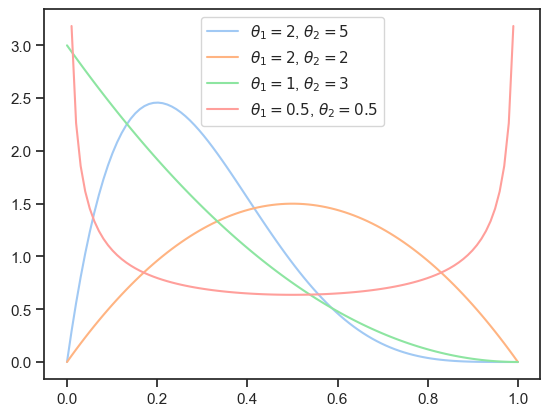

In [53]:
def indicatrix(x, a, b):
    return (x <= b)*(x >= a)

def beta_density(x, theta1=2, theta2=5):
    return (x**(theta1-1))*((1 - x)**(theta2 - 1))*indicatrix(x, 0, 1)/beta(theta1, theta2)

x = np.linspace(0, 1, 100)

thetas = [(2, 5), (2, 2), (1, 3), (.5, .5)]

fig = plt.figure()
ax = fig.add_subplot()

for theta in thetas:
    ax.plot(x, beta_density(x, theta1=theta[0], theta2=theta[1]), label=fr'$\theta_1 = {theta[0]}$, $\theta_2 = {theta[1]}$')

ax.legend()
plt.show()


De ahora en adelante fijamos los parámetros $\theta_1=2$ y $\theta_2=5$.

> 3 - Utilice el método ``NewtonRaphson`` para simular $10000$ réplicas de $X\sim Beta(\theta_1,\theta_2)$. Grafique los resultados.

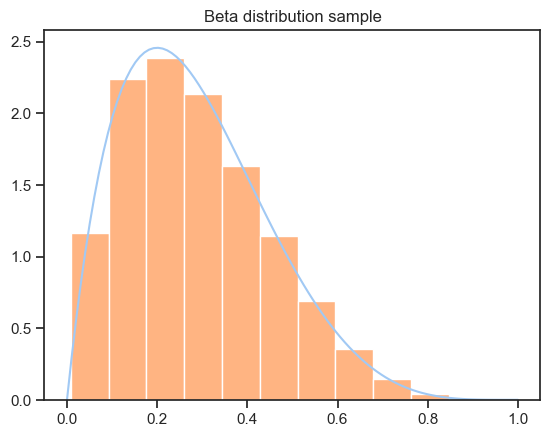

In [54]:
betaval = beta(2, 5)

def beta_distribution(x):
    return (((x - 1)**5)*(5*x + 1)/30 + 1/30)/betaval # Integración con Integral Calculator


beta_sample = newtonRhapson(beta_distribution, beta_density, uniforme(10000, 'numpy'))

fig = plt.figure()

ax = fig.add_subplot(111)

ax.set_title('Beta distribution sample')

# custom_params = {"axes.spines.right": False, "axes.spines.top": False}

# sns.set_theme(style='ticks', palette='pastel')
# sns.histplot(beta_sample, ax=ax)
ax.plot(np.linspace(0, 1, 100), beta_density(np.linspace(0, 1, 100)))
ax.hist(beta_sample, density=True)
plt.show()


> 4 - Programe el método de ``AceptacionRechazo`` que tome una función de densidad $f$ definida en $[0,1]$, una cota apropiada $K$ y dos vectores $u,v\in[0,1]^r$ y retornen réplicas de de una v.a. $X$ de densidad $f$ usando el método de aceptación rechazo usando v.a. auxiliares de densidad $g\sim Unif([0,1])$. 

In [55]:
def aceptaciónRechazo(densityfunc, kbound, uniformsample1, uniformsample2):
    alpha = densityfunc(uniformsample2)/kbound # Me aprovecho de que f está definida en [0, 1], y que g es 1 en ese intervalo.
    accepted_bool = uniformsample1 <= alpha
    return uniformsample2[accepted_bool]

> 5 - Encuentre una cota $K$ para la variable $Beta(\theta_1,\theta_2)$, con $\theta_1,\theta_2$ como en el punto anterior. Implemente el método de aceptación-rechazo con $f_X$ y $K$ para simular réplicas de $Beta(\theta_1,\theta_2)$ usando $10000$ uniformes. Grafique los resultados.

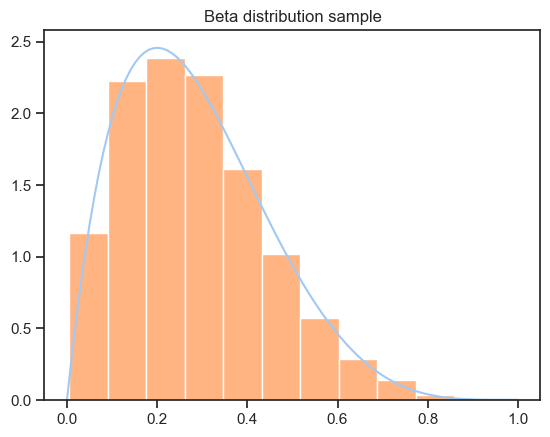

0.9895833333343944


In [56]:
# La constante K la obtengo de maximizar la función densidad de beta,
# obteniendo que es máxima en x = 1/5. Luego beta_density(1/5)*g,
# con g(x) = 1, es siempre mayor o igual que beta_density.

kbound = beta_density(1/5)

beta_sample = aceptaciónRechazo(beta_density, kbound, uniforme(10_000, 'numpy'), uniforme(10_000, 'numpy'))

fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_title('Beta distribution sample')
ax.plot(np.linspace(0, 1, 100), beta_density(np.linspace(0, 1, 100)))
ax.hist(beta_sample, density=True)
plt.show()

# Curiosidad:

print(len(beta_sample) - 10_000/kbound)

> 6 - Para $k = 3, \dots , 5$, simule $n = 10^k$ réplicas de $X$ para cada uno de los métodos implementados. Para cada $k$ grafique los histogramas de las muestras obtenidas.

- ¿En que medida coinciden los resultados ambos métodos y por qué?

- Grafique el tiempo de ejecución en función de la cantidad de réplicas, estime el costo por réplica de cada uno de los métodos y ordene los métodos según su eficiencia.

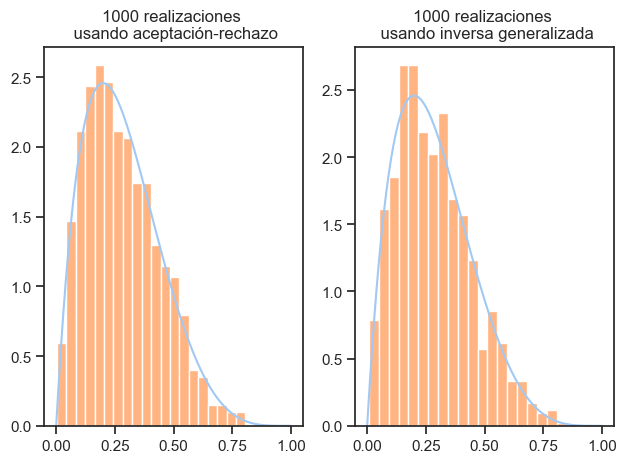

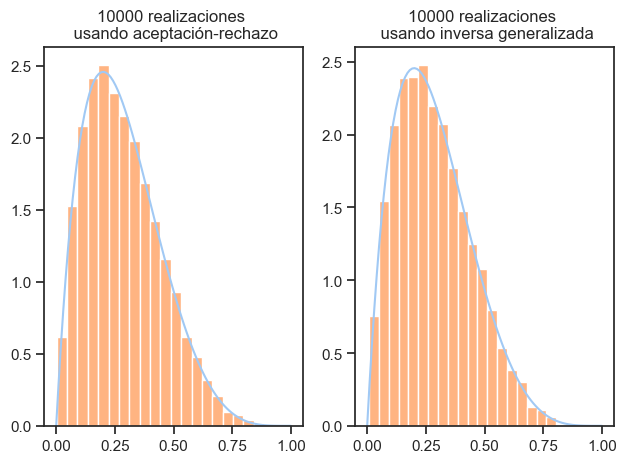

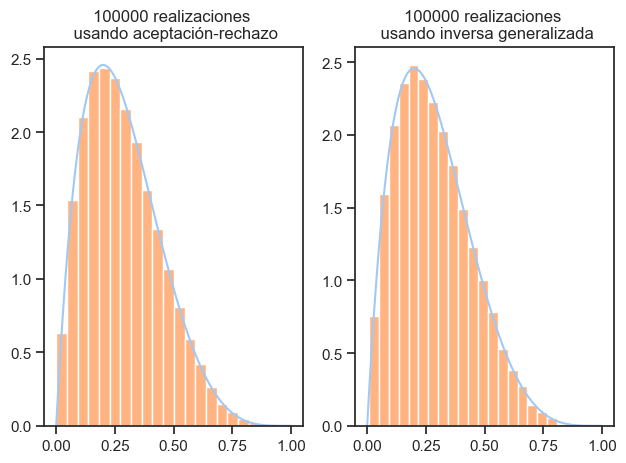

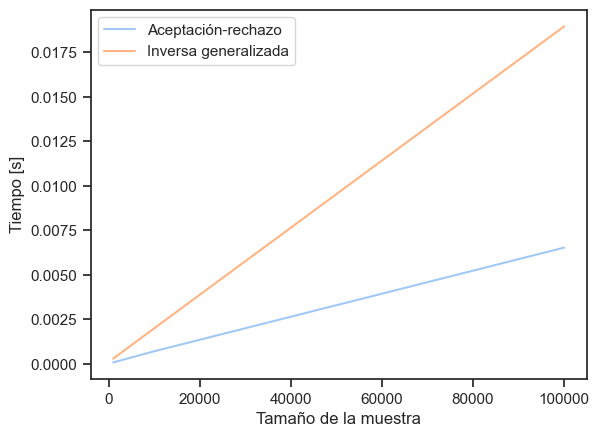

El método de aceptación-rechazo tomó en promedio 7.937379094073549e-08 [s] por cada realización
El método de inversa generalizada tomó en promedio 3.086235128575936e-07 [s] por cada realización


In [57]:
from time import perf_counter

def sample_acceptance_rejection(n, densityfunc, kbound): # Necesario para obtener precisamente n realizaciones de la variable aleatoria.
    uniformsample1 = uniforme(int(kbound*n), 'numpy')
    uniformsample2 = uniforme(int(kbound*n), 'numpy')
    sample = aceptaciónRechazo(densityfunc, kbound, uniformsample1, uniformsample2)
    while len(sample) < n:
        nsimulations = n - len(sample)
        uniformsample1 = uniforme(int(kbound*nsimulations), 'numpy')
        uniformsample2 = uniforme(int(kbound*nsimulations), 'numpy')
        sample = np.concatenate((sample, aceptaciónRechazo(densityfunc, kbound, uniformsample1, uniformsample2)))
    return sample[:n]

def sampling_preformance(nrepeats, samplingfunc, sample_size=1000):
    t = 0
    for _ in range(nrepeats):
        t1 = perf_counter()
        samplingfunc(sample_size)
        t2 = perf_counter()
        t += t2 - t1
    return t/nrepeats



ns = [1000, 10_000, 100_000]

for n in ns:
    ar_beta_sample = sample_acceptance_rejection(n, beta_density, kbound)
    gi_beta_sample = newtonRhapson(beta_distribution, beta_density, uniforme(n, 'numpy'))
    
    fig = plt.figure()
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    ax1.set_title(f'{n} realizaciones \n usando aceptación-rechazo')
    ax2.set_title(f'{n} realizaciones \n usando inversa generalizada')

    ax1.plot(np.linspace(0, 1, 100), beta_density(np.linspace(0, 1, 100)))
    ax2.plot(np.linspace(0, 1, 100), beta_density(np.linspace(0, 1, 100)))

    ax1.hist(ar_beta_sample, density=True, bins=20)
    ax2.hist(gi_beta_sample, density=True, bins=20)

    fig.tight_layout()
    plt.show()


# nrepeats = 1000

# ar_time = sampling_preformance(nrepeats, lambda n: sample_acception_rejection(n, beta_density, kbound))
# gi_time = sampling_preformance(nrepeats, lambda n: newtonRhapson(beta_distribution, beta_density, uniforme(n, 'numpy')))

# print(f'El método de aceptación-rechazo tomó en promedio {ar_time} [s]')
# print(f'El método de inversa generalizada tomó en promedio {gi_time} [s]')
# print(f'El método de la inversa generalizada tomó en promedio {gi_time/ar_time} veces más que el método de aceptación-rechazo')

timefig = plt.figure()
ax = timefig.add_subplot(111)
ax.plot(ns, [sampling_preformance(100, lambda n: sample_acceptance_rejection(n, beta_density, kbound), sample_size=size) for size in ns], label='Aceptación-rechazo')
ax.plot(ns, [sampling_preformance(100, lambda n: newtonRhapson(beta_distribution, beta_density, uniforme(n, 'numpy')), sample_size=size) for size in ns], label='Inversa generalizada')
ax.set_xlabel('Tamaño de la muestra')
ax.set_ylabel('Tiempo [s]')
ax.legend()
plt.show()

print(f'El método de aceptación-rechazo tomó en promedio {sampling_preformance(1000, lambda n: sample_acceptance_rejection(n, beta_density, kbound))/1000} [s] por cada realización')
print(f'El método de inversa generalizada tomó en promedio {sampling_preformance(1000, lambda n: newtonRhapson(beta_distribution, beta_density, uniforme(n, "numpy")))/1000} [s] por cada realización')

Coinciden en que ambos retornan un muestreo de la variable aleatoria pedida. Sin embargo, teóricamente, el método de aceptación rechazo debería retornar realizaciones más fieles de esta, ya que en el método de la inversa generalizada el algoritmo de Newton Rhapson admite un error de una tolerancia dada. Además, aceptación-rechazo es cerca de 4 veces más rápido para este caso. Esto podría verse debido a que para cada realización usando la inversa generalizada, necesitamos generar una variable uniforme, e iterar el método de newton rhapson. Para el método de aceptación rechazo, necesitamos generar mínimo 2 variables uniformes, usualmente 2K variables uniformes, pero no necesitamos llamar a otro algoritmo posiblemente costoso en medio. Como K en este caso es bajo (cercano a 3) entonces es natural que el método de aceptación rechazo sea más rápido.

> 7 - Usando el método más eficiente, simule $n = 100000$ réplicas de $X$, calcule las medias y varianzas muestrales, y luego compare los resultados con los valores teóricos.

In [58]:
x_sample = sample_acceptance_rejection(100_000, beta_density, kbound)

mean_x = np.mean(x_sample)
var_x = np.var(x_sample)

print(f'La media de la muestra es {mean_x}, su varianza es {var_x}. Estos difieren en {np.abs(mean_x - 2/7)} y {np.abs(var_x - 5/196)} de los valores teóricos, respectivamente.') # Las fórmulas para los valores teóricos vienen de proba.

La media de la muestra es 0.28542471163459504, su varianza es 0.025377966596673823. Estos difieren en 0.0002895740796906576 y 0.00013223748495883036 de los valores teóricos, respectivamente.


## Problema 4

Considere $Y_{\lambda,t,s}$ variable aleatoria discreta con

$$ \mathbb{P}(Y_{\lambda,t,s}=k)=\frac{e^{-\lambda}\lambda^k/k!}{\sum^s_{j=t}e^{-\lambda}\lambda^j/j!} \text{ para }k=t,\dots,s \, .$$

Para las evaluaciones considere $\lambda = 5$.

Analizaremos dos métodos que reciban $t$ y $s$, y simulen $n$ réplicas de $Y_{\lambda,t,s}$.

> 1 - Implemente el método de aceptacion-rechazo utilizando variables uniformes discretas.

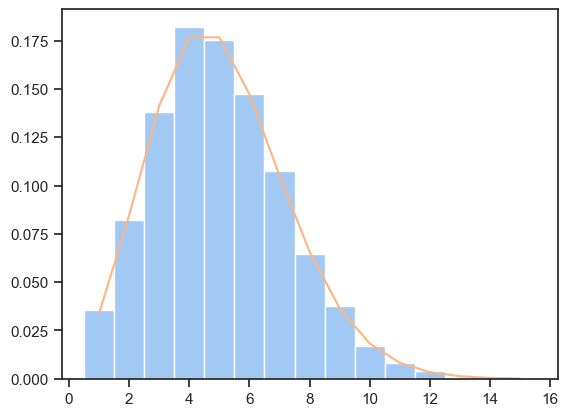

In [59]:
from scipy.special import factorial

lamb = 5
t = 1
s = 15

def y_prob(n, t, s, preset_normalization=None): # Preset_normalization nos permite hacer una sóla vez el cálculo de la cte de normalización si vamos a llamar muchas veces esta fn con el mismo t y s.
    numerador = (np.exp(-lamb)*(lamb**n)/factorial(n))
    if preset_normalization is not None:
        denominador = preset_normalization
    else:
        all_n = np.arange(t, s+1)
        denominador = np.sum(np.exp(-lamb)*(lamb**all_n)/factorial(all_n))
    return numerador/denominador


def y_sample_aceptacionrechazo(n, t, s):
    k = np.max(y_prob(np.arange(t, s+1), t, s))*(s-t+1)
    normalization = np.sum(np.exp(-lamb)*(lamb**np.arange(t, s+1))/factorial(np.arange(t, s+1)))
    sample = np.zeros(n)
    i = 0
    while i < n: # Se podría hacer más eficiente si se estima primero el número de iteraciones necesarias para hacer el cálculo vectorizado, y luego corregir hasta tener el número exacto.
        y = np.random.randint(t, s+1)
        alpha = y_prob(y, t, s, preset_normalization=normalization)/(k*1/(s-t+1))
        if np.random.uniform(0, 1) <= alpha:
            sample[i] = y
            i += 1
    return np.array(sample)

y_sample = y_sample_aceptacionrechazo(10_000, t, s)

plt.hist(y_sample, density=True, bins=np.arange(t, s+2)-.5)
plt.plot(np.arange(t, s+1), y_prob(np.arange(t, s+1), t, s))

> 2 - Implemente el método de simulación condicional de una variable aleatoria apropiada.

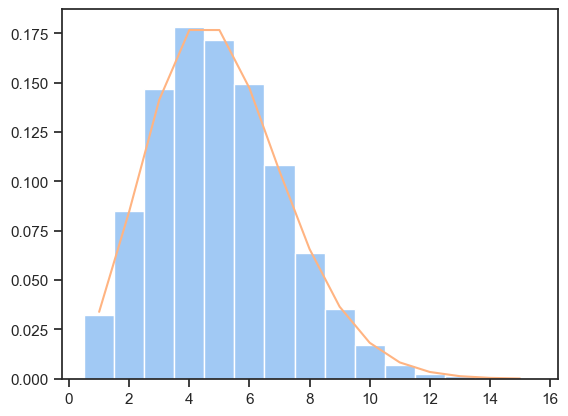

In [60]:
# Notamos que la variable Y es simplemente una poisson de parámetro lambda
# condicionada a estar en el intervalo [t, s]. Por lo tanto, la variable
# aleatoria apropiada es una Poisson de parámetro lambda.

from numpy.random import poisson

def conditional_simulation(n, t, s): # puede ser mucho más eficiente si quitamos la restricción de retornar precisamente n realizaciones, o lo hacemos de forma más inteligente.
    sample = np.zeros(n)
    i = 0
    while i < n:
        y = poisson(lam=lamb)
        if t <= y <= s:
            sample[i] = y
            i += 1
    return sample

y_sample = conditional_simulation(10_000, t, s)

plt.hist(y_sample, density=True, bins=np.arange(t, s+2)-.5)
plt.plot(np.arange(t, s+1), y_prob(np.arange(t, s+1), t, s))


> 3 - Evalue la eficiencia teórica de ambos métodos.

> 4 - Compare la precisión numérica de los dos métodos considerando sus histogramas y las eficiencias numéricas para los siguientes casos:
- $t=0$, $s=10$.
- $t=10$, $s=20$.